<a href="https://colab.research.google.com/github/tzsoulcap/Agricultural-Product-Images-for-Super-AI-Engineer-SS3/blob/master/Agricultural_Product_Images_for_Super_AI_Engineer_SS3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## install library

In [1]:
!pip install ultralytics==8.0.134 roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 629.1/629.1 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.2 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=32f3f0dc9e9b9158d53815b7f87489d19a3fcebac900bff0bba0095fa944b1d2
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.0
    Uninstalling pyparsing-3.1.0:
      

## setup kaggle

In [1]:
!mkdir ~/.kaggle
!cp /content/drive/MyDrive/hackathon/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle competitions download -c wheat-head-for-superai-3

100% 3.46G/3.47G [00:42<00:00, 57.4MB/s]
100% 3.47G/3.47G [00:42<00:00, 87.2MB/s]


In [ ]:
!mkdir datasets
!unzip /content/wheat-head-for-superai-3.zip -d /content/datasets

## create dataset for Yolo format

In [5]:
import pandas as pd
import numpy as np
import xml.etree.cElementTree as et
import os

In [6]:
import cv2
import matplotlib.pyplot as plt

In [37]:
from sklearn.model_selection import train_test_split

In [55]:
import shutil

**List file name**

In [48]:
xml_files = list(filter(lambda x: x.endswith('.xml'), os.listdir('/content/datasets/Wheat-Head/train')))
xml_files = list(map(lambda x: x[:-4], xml_files))

**Split data**

In [49]:
train, test = train_test_split(xml_files, test_size=0.1, random_state=99)
train, valid = train_test_split(train, test_size=0.1, random_state=99)

In [50]:
(len(train), len(test), len(valid))

(3691, 456, 411)

**convert bbox from pascal voc to yolo format**

In [12]:
def pascal_voc_to_yolo(x1, y1, x2, y2, image_w, image_h):
    return f"0 {((x2 + x1)/(2*image_w))} {((y2 + y1)/(2*image_h))} {(x2 - x1)/image_w} {(y2 - y1)/image_h}"

In [ ]:
!mkdir /content/data_yolo
!mkdir /content/data_yolo/train
!mkdir /content/data_yolo/test
!mkdir /content/data_yolo/valid
!mkdir /content/data_yolo/train/images
!mkdir /content/data_yolo/train/labels
!mkdir /content/data_yolo/test/images
!mkdir /content/data_yolo/test/labels
!mkdir /content/data_yolo/valid/images
!mkdir /content/data_yolo/valid/labels

In [56]:
for f_name in train:
    shutil.copyfile(f"/content/datasets/Wheat-Head/train/{f_name}.png", f"/content/data_yolo/train/images/{f_name}.png")
    tree = et.parse(f"/content/datasets/Wheat-Head/train/{f_name}.xml")
    root = tree.getroot()
    all_obj = root.findall('object')
    boxes = []
    for obj in all_obj:
        for bbox in obj.iter('bndbox'):
            boxes.append(pascal_voc_to_yolo(int(bbox[0].text), int(bbox[1].text), int(bbox[2].text), int(bbox[3].text), 512, 512))
    f = open(f'/content/data_yolo/train/labels/{f_name}.txt', 'w')
    f.write('\n'.join(boxes))
    f.close()

In [57]:
for f_name in test:
    shutil.copyfile(f"/content/datasets/Wheat-Head/train/{f_name}.png", f"/content/data_yolo/test/images/{f_name}.png")
    tree = et.parse(f"/content/datasets/Wheat-Head/train/{f_name}.xml")
    root = tree.getroot()
    all_obj = root.findall('object')
    boxes = []
    for obj in all_obj:
        for bbox in obj.iter('bndbox'):
            boxes.append(pascal_voc_to_yolo(int(bbox[0].text), int(bbox[1].text), int(bbox[2].text), int(bbox[3].text), 512, 512))
    f = open(f'/content/data_yolo/test/labels/{f_name}.txt', 'w')
    f.write('\n'.join(boxes))
    f.close()

In [58]:
for f_name in valid:
    shutil.copyfile(f"/content/datasets/Wheat-Head/train/{f_name}.png", f"/content/data_yolo/valid/images/{f_name}.png")
    tree = et.parse(f"/content/datasets/Wheat-Head/train/{f_name}.xml")
    root = tree.getroot()
    all_obj = root.findall('object')
    boxes = []
    for obj in all_obj:
        for bbox in obj.iter('bndbox'):
            boxes.append(pascal_voc_to_yolo(int(bbox[0].text), int(bbox[1].text), int(bbox[2].text), int(bbox[3].text), 512, 512))
    f = open(f'/content/data_yolo/valid/labels/{f_name}.txt', 'w')
    f.write('\n'.join(boxes))
    f.close()

In [ ]:
all_obj = root.findall('object')
for obj in all_obj:
    for bbox in obj.iter('bndbox'):
        print(pascal_voc_to_yolo(int(bbox[0].text), int(bbox[1].text), int(bbox[2].text), int(bbox[3].text), 512, 512))
        cv2.rectangle(image,(int(bbox[0].text),int(bbox[1].text)),
            (int(bbox[2].text),int(bbox[3].text)), (0, 0, 255), 1)

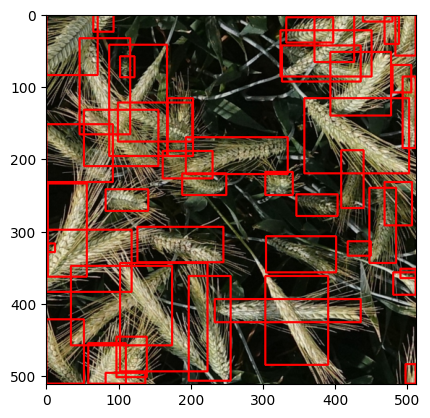

In [62]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

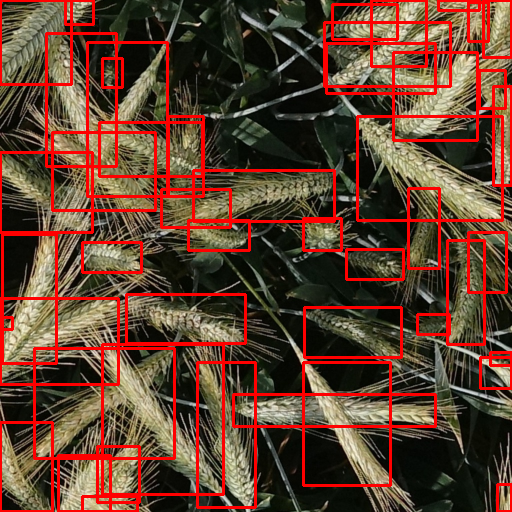

In [61]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [37]:
def get_size_img(files):
    size = files.findall('size')[0]
    width = size[0].text
    height = size[1].text
    return [width, height]

In [38]:
w, h = get_size_img(root)
print(w, h)

512 512
